## Import required packages

In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# time-series imports
from datetime import datetime

from statsmodels.tsa import seasonal
from statsmodels.tsa.stattools import adfuller

## Load login data 

Exploratory data analysis The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [135]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [136]:
logins = logins.set_index(pd.to_datetime(logins['login_time']))
logins['Count'] = 1
logins.drop(columns='login_time', axis=1, inplace=True)
logins.head()

,Count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [137]:
# Aggregate in 15-min intervals

login_15 = pd.DataFrame(logins.Count.resample('15Min').sum())
login_15.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [138]:
# Chech for missing data

login_15.isna().sum()

Count    0
dtype: int64

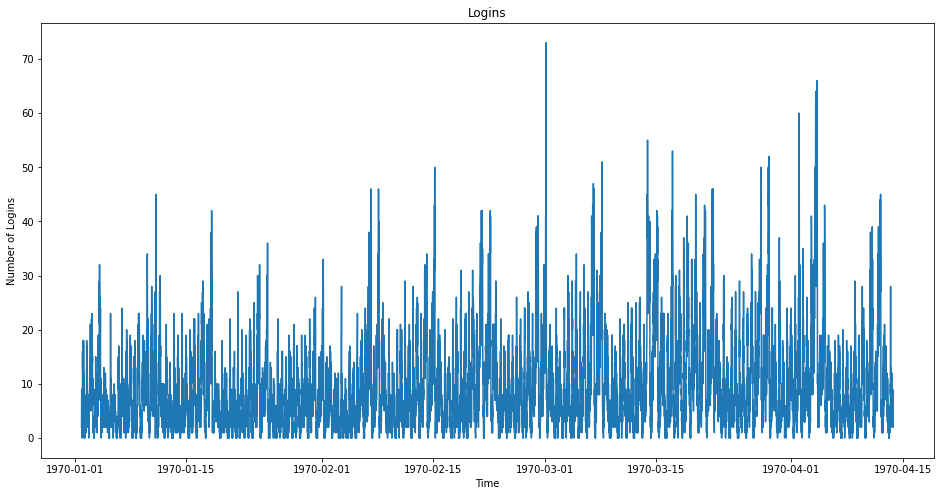

In [139]:
# Plot 15-min logins

fig, ax=plt.subplots(figsize=(16,8))
ax.plot(login_15.index, login_15['Count'])
ax.set_xlabel('Time')
ax.set_ylabel('Number of Logins')
#ax.tight_layout()
ax.set_title('Logins')
plt.show()

I do a Dickery Fuller test to see if the daily login data is stationary. Statinary means that the data does not change with time or better say, mean and variance stay the same overtime.

In [53]:
# Run Dickery Fuller test to check stationary

adfuller(logins_daily)

(-1.4033164919219923,
 0.5806851218557972,
 13,
 89,
 {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 1173.2398848029677)

The null hypothesis in Dickey Fuller test is that the data is not statinary. Here the p-value is 0.58, assuming 95% confisence interval, we fail to reject the null hypothesis. Therefore, data is not stationary and it changes with time. In the next step we I use _statsmodel seasonal decompose_ to see elements of the time series.

I am using daily logins with period of 7 (number of days in a week), and additive model.

Text(0.5, 1.0, 'total log-ins residuals')

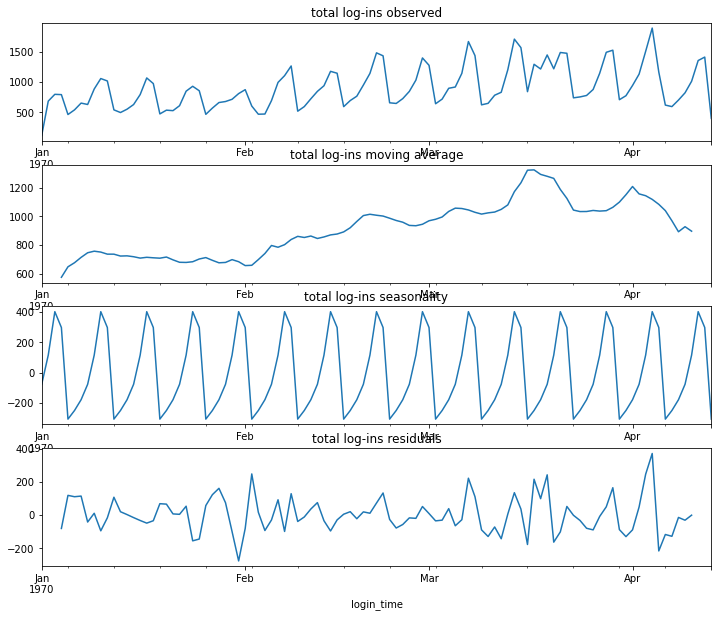

In [64]:
# Decompose daily-login series and plot

r = seasonal.seasonal_decompose(logins_daily.Count, model='additive', period=7)

# Plot gathered statistics
fig, (axes0, axes1, axes2, axes3) = plt.subplots(4,1, figsize=(12,10))

r.observed.plot(ax=axes0)
axes0.set_title('total log-ins observed')

r.trend.plot(ax=axes1)
axes1.set_title('total log-ins moving average')

r.seasonal.plot(ax=axes2)
axes2.set_title('total log-ins seasonality')

r.resid.plot(ax=axes3)
axes3.set_title('total log-ins residuals')


From above plots, I can see that the mean value of daily logins is increasing overtime, which confirms the results of Dickey Fuller test that the data in not stationary.

In [140]:
hourly = pd.DataFrame(logins.Count.resample('H').sum())
hourly['Hour of the day'] = hourly.index.hour
hourly

,Count,Hour of the day
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0
...,...,...
1970-04-13 14:00:00,32,14
1970-04-13 15:00:00,19,15
1970-04-13 16:00:00,22,16


In [141]:
daily = pd.DataFrame(logins.Count.resample('D').sum())
daily['Day of the week'] = daily.index.weekday
daily


,Count,Day of the week
login_time,,
1970-01-01,112,3
1970-01-02,681,4
1970-01-03,793,5
1970-01-04,788,6
1970-01-05,459,0
...,...,...
1970-04-09,818,3
1970-04-10,1009,4
1970-04-11,1352,5


[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

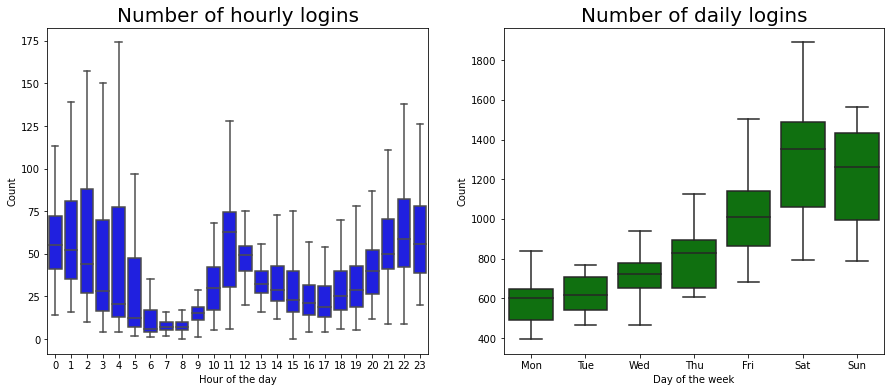

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(y='Count', x='Hour of the day', ax=ax[0], data=hourly, showfliers = False, color='blue')
ax[0].set_title('Number of hourly logins', fontsize = 20, loc='center')

#ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
#ax[0].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(y='Count', x='Day of the week', ax=ax[1], data=daily, showfliers = False, color='green')
ax[1].set_title('Number of daily logins', fontsize = 20, loc='center')
ax[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#ax[1].set_ylabel('Salinity Surface', fontsize = 16, fontdict=dict(weight='bold'))
